# VarClump2D: Singularity Analysis of LM method

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D: Stacked on frequency

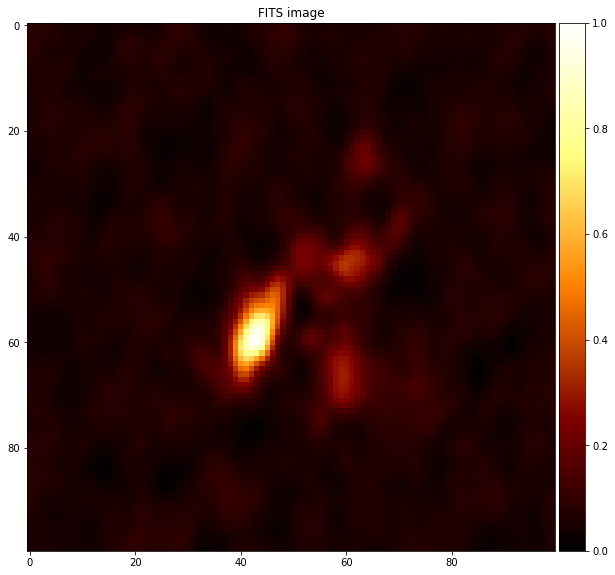

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

### Conditioning/Singularity analysis

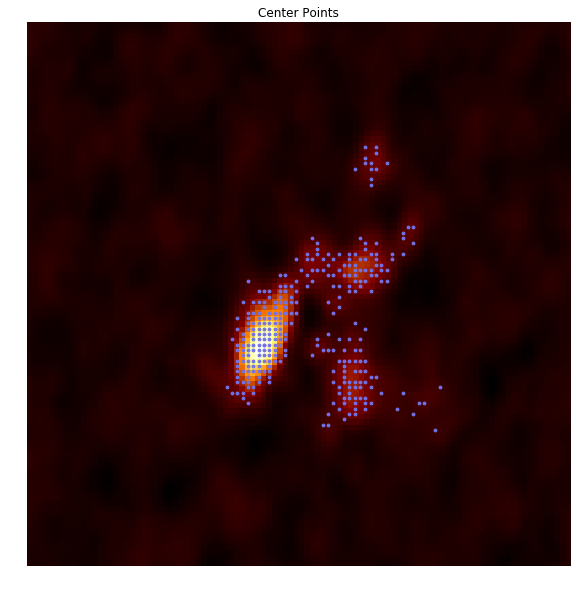

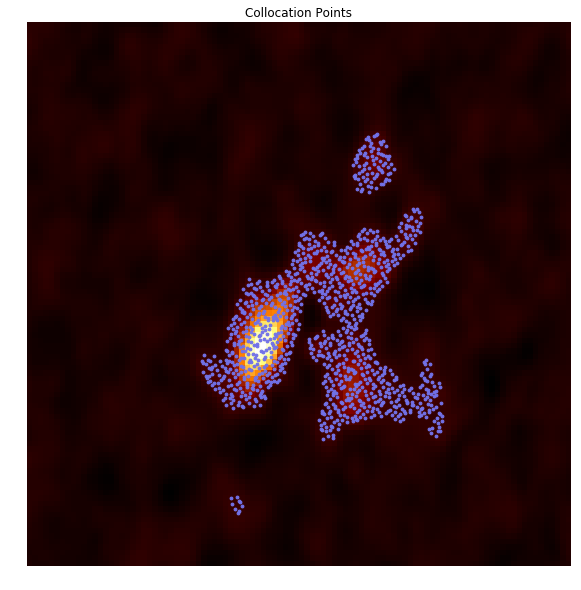

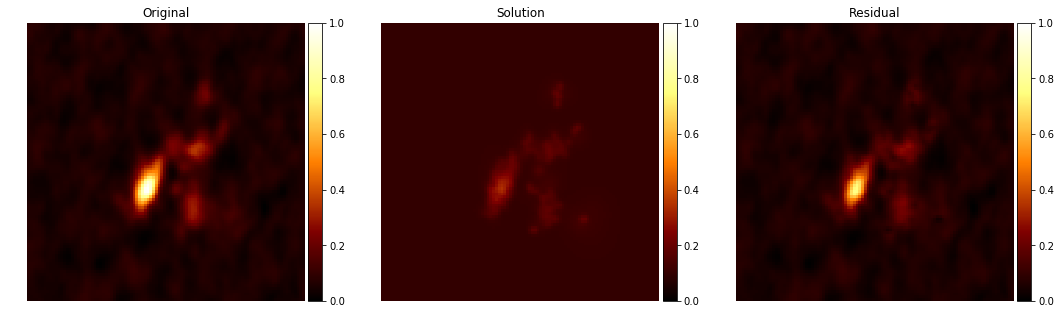

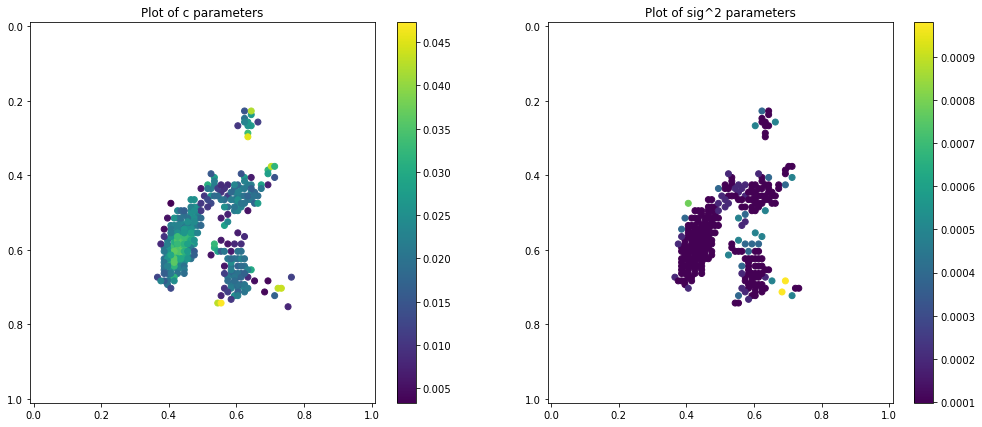

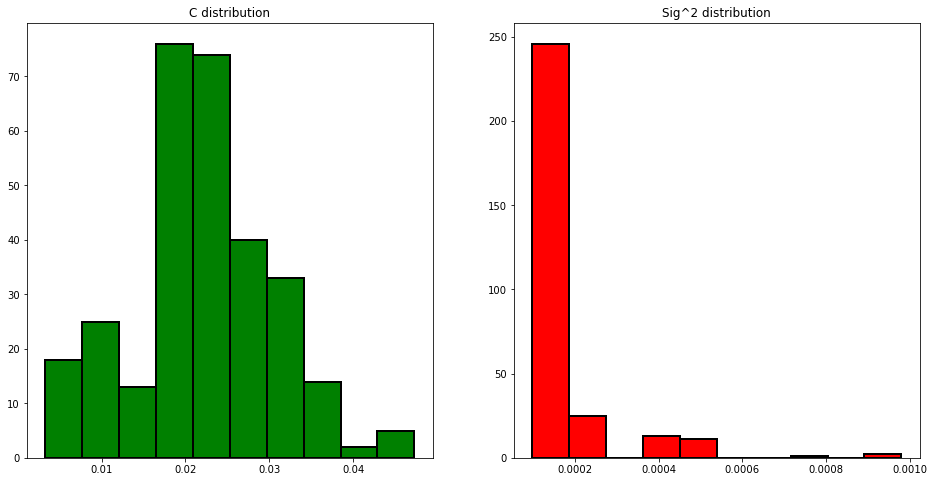

In [4]:
##########################################
# Test 1: Repeated center points
##########################################

# number of points of each type
Nb = 0
Nc = 300
Ne = 4*Nc-Nb

#repeating a center point
center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
center_points[1] = center_points[0]
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm00 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120115

Residual stats:
Residual RMS: 0.10106434610036164
Residual Variance: 1.9032913400374352e-05
Residual Entropy: 7.1278708417097905
Total elapsed time: 488.62623500823975 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.21446228357784142
Mean min distance between collocation and center points: 0.011996915431063994

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.06817043002193802
Max min distance in the (standarized) parameters space: 0.48648371247609873


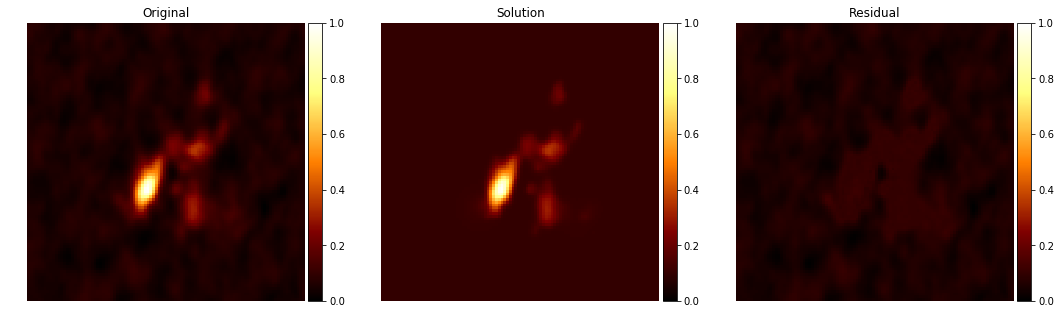

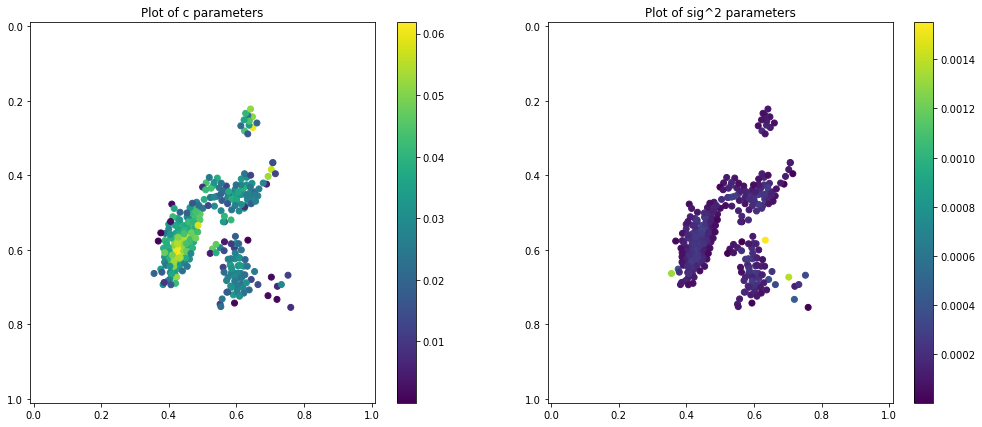

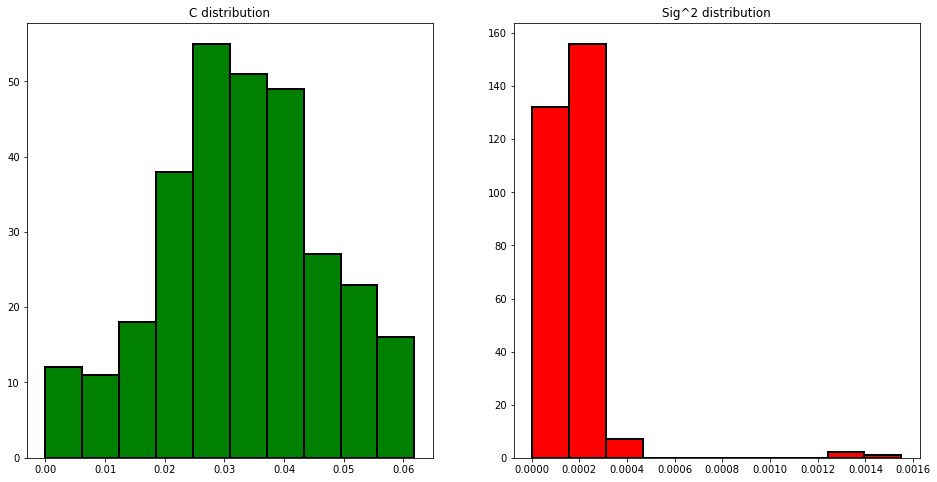

In [5]:
nfev = 100 * (len(elm00.get_params())+1)
elm_solver(elm00, method='standard', max_nfev=nfev)

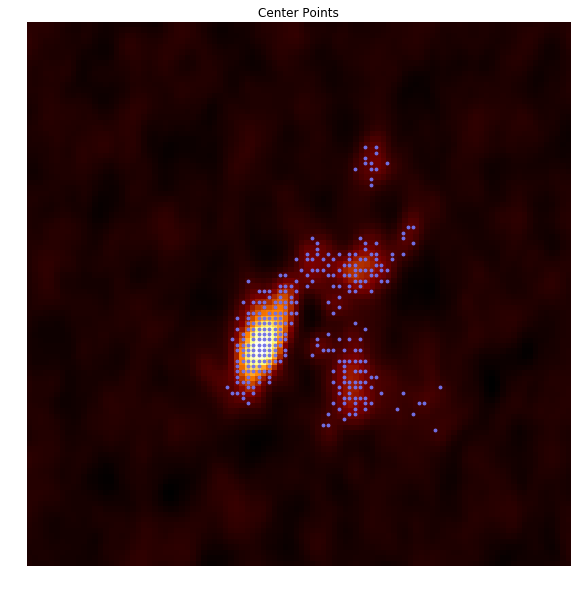

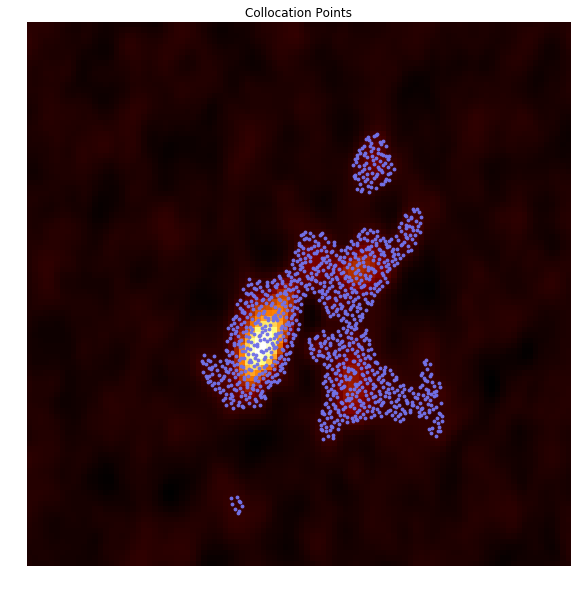

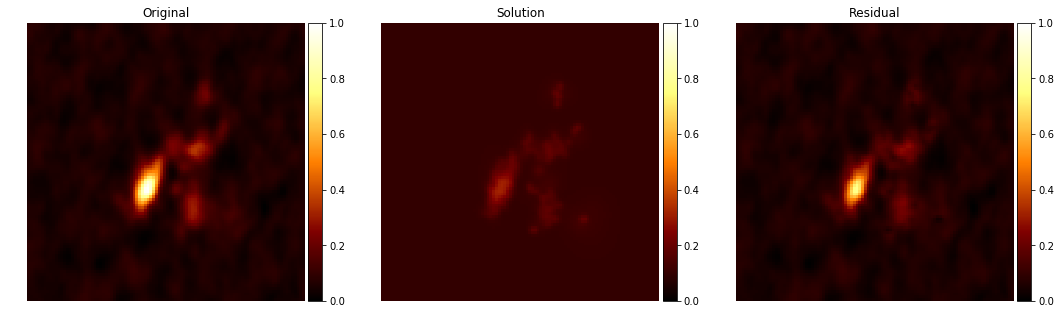

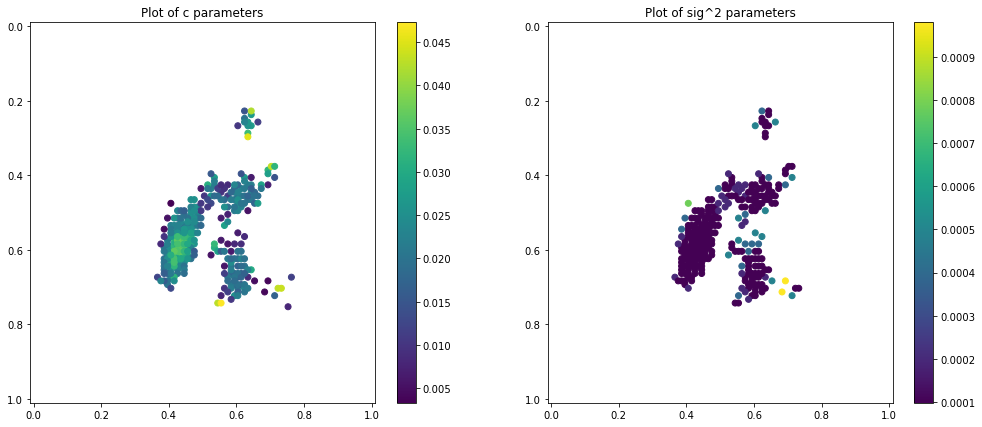

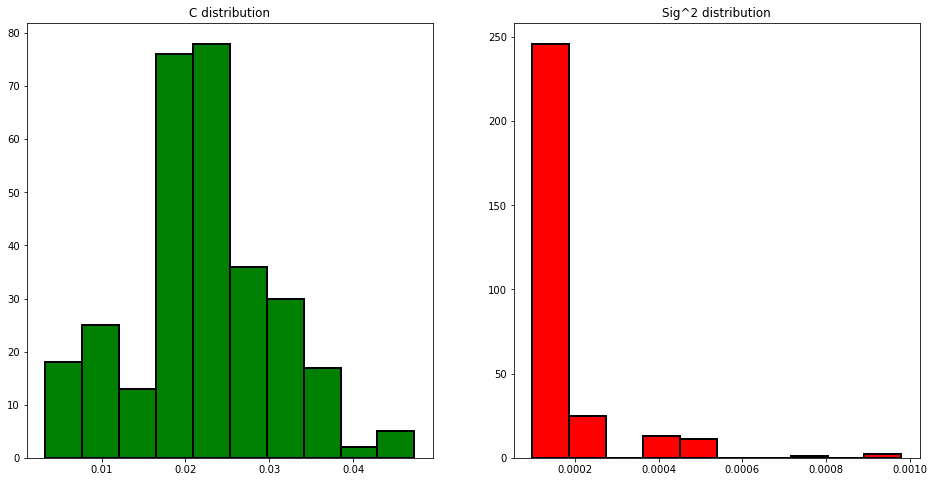

In [6]:
##########################################
# Test 1: Repeated collocation points
##########################################

# number of points of each type
Nb = 0
Nc = 300
Ne = 4*Nc-Nb

#repeating a collocation point
center_points = random_centers_generation(data, Nc, base_level=base_level, power=7.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
collocation_points[1] = collocation_points[0]
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]


# visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
params_plot(c0, sig0, xc, yc)
params_distribution_plot(c0, sig0)


elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., d1psi1=d1psi, 
                d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120112

Residual stats:
Residual RMS: 0.10106247042983754
Residual Variance: 2.0030057048684505e-05
Residual Entropy: 7.136081856154449
Total elapsed time: 460.59910321235657 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.21148057103762527
Mean min distance between collocation and center points: 0.01192197803861568

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.06931935108425262
Max min distance in the (standarized) parameters space: 0.4191560396369451


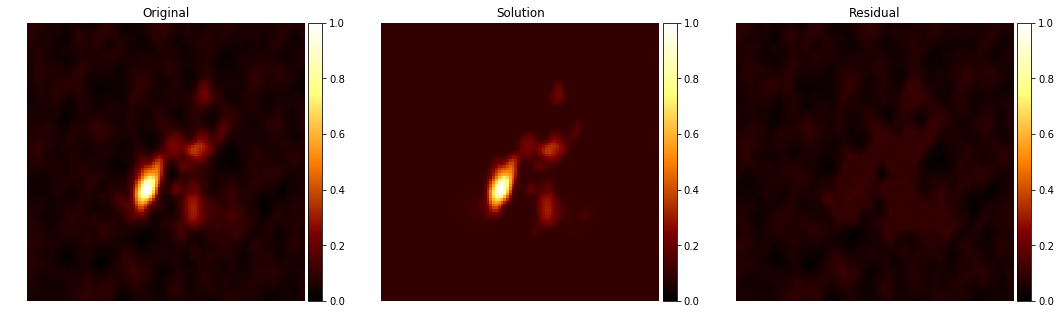

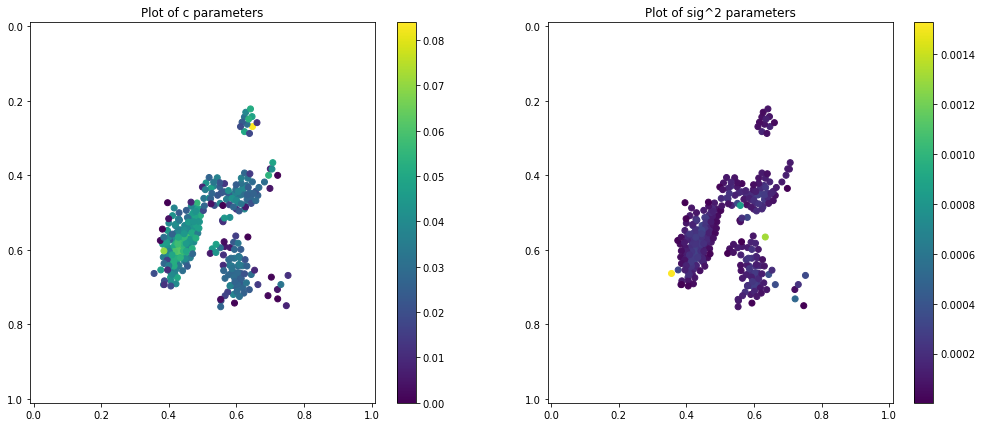

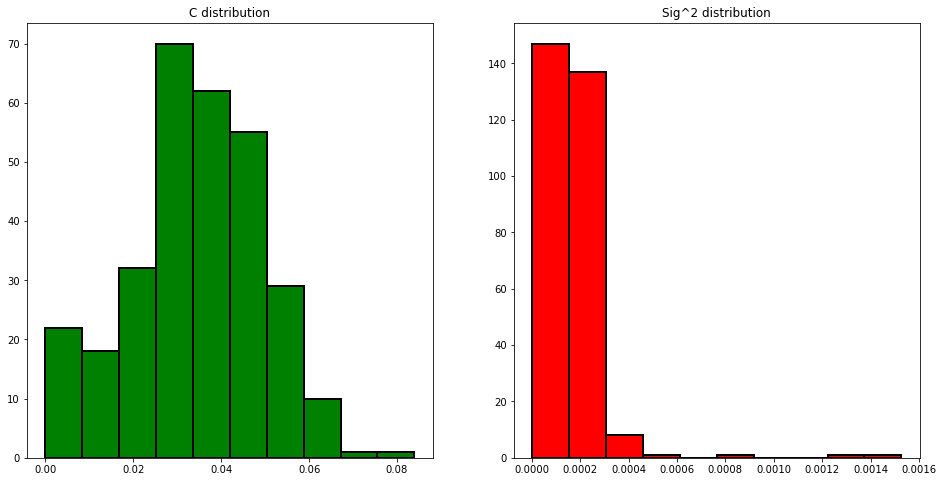

In [7]:
nfev = 100 * (len(elm01.get_params())+1)
elm_solver(elm01, method='standard', max_nfev=nfev)